# Data Wrangling

## Advanced Data Wrangling

---

Steps - *Note: bolded points are phases of data wrangling*
1. Define a question (what is the general population of stray dogs in San Antonio, TX)
2. **Gather data** (distributed field surveys on foot and in cars turned in, compiling into single CSV or something)
3. **Assess data** (What issues are there, what's missing, what's inaccurate, etc.)
4. **Clean data** (Remove missing values, adjust inaccuracies, regather data)
5. Answer question (Do some descriptive statistics)

---

**Exploratory Data Analysis (EDA)** comes after data wrangling

**ETL vs. Wrangling**
- ETL - gather and combine data into one spot (data warehouse)
  - Done on structured data
- Wrangling - gather, assess, clean data
  - Done on complex/messy data

Wrangling is a cycle that you might come back to here and there. It's not a linear progression in the real world.

---

**Project Steps Summary**
- Gather two datasets using two different data gathering methods.
- Assess the data according to two quality and two tidiness metrics.
- Clean the data to solve the four issues found in the assessing step,
- Combine your two datasets into one dataset
- Update the data store with the cleaned data.
- Produce visualizations on the cleaned data, and answer a research question on the dataset.

---

----
----

### Gathering Data

#### Programatically Unzipping Files with Python

In [2]:
import zipfile as z

try:
    with z.ZipFile("file.zip", "r") as zip_ref:
        zip_ref.extractall("targetdir")  # can untar and probably more
except:
    print("yeah")

yeah


#### Working with flat files (TSV, CSV)

In [3]:
try:
    tsv_list = []
    with open("filename.csv") as tsv_file:
        for line in tsv_file:
            tsv_list.append(line.rstrip('\n').split('\t'))

    '''OR'''

    import pandas as pd

    df_tsv = pd.read_csv('filename.tsv', sep='\t')  # can also do ';' if that's the delimiter, as well as... anything else
    df_tsv.head()
    # Much simpler
except:
    print("yeah")

yeah


#### `.read_csv()` parameters/args

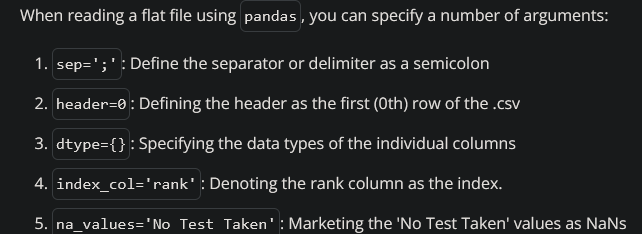

`na_values` just says what values to replace with a NaN. 

#### Programatically Downloading Files

In [4]:
import requests
import os

In [ ]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/SeptemberBumblebee/59ad9901_3-the-third-man/3-the-third-man.txt']  # this one will return a 403

In [20]:
type(response.content)

bytes

In [ ]:
for url in ebert_review_urls:
    response = requests.get(url)  # HTTP GET request
    response.raise_for_status()   # if response code is error, raise an error
    folder_path = os.getcwd() + "\\" + "datasets" + "\\" +  "ebert_reviews_2017"
    path = os.path.join(folder_path, url.split('/')[-1])  # grabs filename from url and joins with a foldername
    
    print(path)

    with open(path, mode='wb') as f:  # 'write+binary mode' because that is the datatype of the content attrib
        f.write(response.content)

c:\Users\Ethan\OneDrive\Documents\Code\Python Projects\data-wrangling\datasets\ebert_reviews_2017\1-the-wizard-of-oz-1939-film.txt
c:\Users\Ethan\OneDrive\Documents\Code\Python Projects\data-wrangling\datasets\ebert_reviews_2017\2-citizen-kane.txt
c:\Users\Ethan\OneDrive\Documents\Code\Python Projects\data-wrangling\datasets\ebert_reviews_2017\3-the-third-man.txt


HTTPError: 403 Client Error: Forbidden for url: https://d17h27t6h515a5.cloudfront.net/topher/2017/SeptemberBumblebee/59ad9901_3-the-third-man/3-the-third-man.txt

In [15]:
os.listdir(folder_path)

['1-the-wizard-of-oz-1939-film.txt',
 '2-citizen-kane.txt',
 '3-the-third-man.txt']

#### Encoding/Char sets

You can specify if a file is in UTF-8 or ASCII or something while reading them.

Ex. 
```python
pd.read_csv('test.csv', encoding='utf8')
```

#### Encoding/Decoding built-in methods

In [ ]:
'hello world'.encode('ASCII')  # converts to "Bytes" type

b'hello world'

In [ ]:
b'hello world'.decode('ASCII')  # converts to unicode "str" type

'hello world'

#### Reading text files

In [26]:
import glob  # allows you to use NIX-like paths
import pandas as pd

In [30]:
glob.glob(folder_path + "/*.txt")

['c:\\Users\\Ethan\\OneDrive\\Documents\\Code\\Python Projects\\data-wrangling\\datasets\\ebert_reviews_2017\\1-the-wizard-of-oz-1939-film.txt',
 'c:\\Users\\Ethan\\OneDrive\\Documents\\Code\\Python Projects\\data-wrangling\\datasets\\ebert_reviews_2017\\2-citizen-kane.txt',
 'c:\\Users\\Ethan\\OneDrive\\Documents\\Code\\Python Projects\\data-wrangling\\datasets\\ebert_reviews_2017\\3-the-third-man.txt']

In [ ]:
text_list = []

for review in glob.glob(folder_path + "/*.txt"):  # glob patterns!
    with open(review, encoding="utf-8") as f:
        title = f.readline()[:-1] # slice off \n

        review_url = f.readline()[:-1]
        review_text = f.read()  # read the rest of the file

        text_list.append({'title': title,
                          'review_url': review_url,
                          'review_text': review_text})
        
    df = pd.DataFrame(text_list, columns=list(text_list[0].keys()))

df.head()

,title,review_url,review_text
0,The Wizard of Oz (1939),http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,Citizen Kane (1941),http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...
2,The Third Man (1949),http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...


#### Gathering Data w/ APIs

In [ ]:
import requests
import json
import os

In [52]:
book = requests.get("https://archive.org/metadata/cu31924067841738")
book

<Response [200]>

In [53]:
book.raise_for_status()

In [54]:
json_data = book.json()
print(json_data)

{'created': 1751529242, 'd1': 'ia601304.us.archive.org', 'd2': 'ia801304.us.archive.org', 'dir': '/12/items/cu31924067841738', 'files': [{'name': '__ia_thumb.jpg', 'source': 'original', 'mtime': '1653667852', 'size': '19027', 'md5': '9e451931d5183c5fea9e1ff9710d3b30', 'crc32': 'b91c4379', 'sha1': '84f729b6118df1e60f1db3a75017b1312c7db959', 'format': 'Item Tile', 'rotation': '0'}, {'name': 'cu31924067841738.djvu', 'source': 'derivative', 'format': 'DjVu', 'original': 'cu31924067841738_djvu.xml', 'md5': '244b045ec10de46d78e140f6c13a86e2', 'mtime': '1257613982', 'size': '5933724', 'crc32': '38d9d914', 'sha1': '8c915daa0ed20788d60424ea536db6d38b7e254c'}, {'name': 'cu31924067841738.epub', 'source': 'derivative', 'original': 'cu31924067841738_abbyy.gz', 'mtime': '1700038661', 'size': '3639480', 'md5': '9eecc6e95791ef536c548abfd0fca9f3', 'crc32': '9e3a7aa1', 'sha1': '94ecf7bf5d63d3b3456979413c73d768d80e714e', 'format': 'EPUB'}, {'name': 'cu31924067841738.gif', 'source': 'derivative', 'format'

In [59]:
fullpath = os.getcwd() + "\\datasets\\archive_org\\book.json"
with open(fullpath, 'w') as f:
    json.dump(json_data, f)

##### We can also use customized libs

In [ ]:
from internetarchive import get_item

book = get_item('cu31924067841738') # returns Item object
print(book)

Item(identifier='cu31924067841738')


In [62]:
for k,v in book.metadata.items():
    print(k, ":", v)

mediatype : texts
collection : ['cornell', 'americana']
title : The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry
identifier : cu31924067841738
uploader : hank@archive.org
addeddate : 2009-11-01 15:20:02
identifier-access : http://www.archive.org/details/cu31924067841738
identifier-ark : ark:/13960/t4vh63v8d
sponsor : MSN
contributor : Cornell University Library
description : ['The metadata below describe the original scanning. Follow the "All Files: HTTP" link in the "View the book" box to the left to find XML files that contain more metadata about the original images and the derived formats (OCR results, PDF etc.). See also the <a href="http://www.archive.org/about/faqs.php#140" rel="nofollow">What is the directory structure for the texts?</a> FAQ for information about file content and naming conventions.', 'viii, 360 p. 20 cm']
camera : EOS-1Ds MarkII
lcamid : 338213
rcamid : 336718
o

##### Now we'll play with the returned data

In [ ]:
book = requests.get("https://archive.org/metadata/cu31924067841738")

<class 'bytes'>
<class 'str'>


In [68]:
print(type(book.content))
print(type(book.text))

<class 'bytes'>
<class 'str'>


You can load either the binary data or the string data and store as a JSON using `json.loads()`

In [73]:
json_book_content = json.loads(book.content)

In [74]:
json_book_text = json.loads(book.text)

json_book_content == json_book_text

True

Or you can just use the `.json()` method on the `response` object

In [76]:
book.json() == json_book_content

True

In [ ]:
json_book_content  # explore the data

{'created': 1751529242,
 'd1': 'ia601304.us.archive.org',
 'd2': 'ia801304.us.archive.org',
 'dir': '/12/items/cu31924067841738',
 'files': [{'name': '__ia_thumb.jpg',
   'source': 'original',
   'mtime': '1653667852',
   'size': '19027',
   'md5': '9e451931d5183c5fea9e1ff9710d3b30',
   'crc32': 'b91c4379',
   'sha1': '84f729b6118df1e60f1db3a75017b1312c7db959',
   'format': 'Item Tile',
   'rotation': '0'},
  {'name': 'cu31924067841738.djvu',
   'source': 'derivative',
   'format': 'DjVu',
   'original': 'cu31924067841738_djvu.xml',
   'md5': '244b045ec10de46d78e140f6c13a86e2',
   'mtime': '1257613982',
   'size': '5933724',
   'crc32': '38d9d914',
   'sha1': '8c915daa0ed20788d60424ea536db6d38b7e254c'},
  {'name': 'cu31924067841738.epub',
   'source': 'derivative',
   'original': 'cu31924067841738_abbyy.gz',
   'mtime': '1700038661',
   'size': '3639480',
   'md5': '9eecc6e95791ef536c548abfd0fca9f3',
   'crc32': '9e3a7aa1',
   'sha1': '94ecf7bf5d63d3b3456979413c73d768d80e714e',
   'for

Use bracket notation to access a certain key

In [ ]:
print(json_book_content['files'][0]['name'] + ":", json_book_content['files'][0]['sha1'])

__ia_thumb.jpg: 84f729b6118df1e60f1db3a75017b1312c7db959


In [101]:
json_book_content['metadata']

{'mediatype': 'texts',
 'collection': ['cornell', 'americana'],
 'title': 'The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry',
 'identifier': 'cu31924067841738',
 'uploader': 'hank@archive.org',
 'addeddate': '2009-11-01 15:20:02',
 'identifier-access': 'http://www.archive.org/details/cu31924067841738',
 'identifier-ark': 'ark:/13960/t4vh63v8d',
 'sponsor': 'MSN',
 'contributor': 'Cornell University Library',
 'description': ['The metadata below describe the original scanning. Follow the "All Files: HTTP" link in the "View the book" box to the left to find XML files that contain more metadata about the original images and the derived formats (OCR results, PDF etc.). See also the <a href="http://www.archive.org/about/faqs.php#140" rel="nofollow">What is the directory structure for the texts?</a> FAQ for information about file content and naming conventions.',
  'viii, 360 p. 20 cm'],
 'ca

In [103]:
print("Title is:", json_book_content['metadata']['title'])

Title is: The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry


In [106]:
json_book_content['reviews'][0]['stars']

'1'

In [ ]:
dictionary = {1: 'help', 2: 'me'}
json.dumps(dictionary)  # converts/serializes the dictionary object into dictionary. opposite would be using .loads()
# notice that the keys are strings. JSON only supports keys that are strings

'{"1": "help", "2": "me"}'

#### Web Scraping

Gathering HTML files and extracting data

In [111]:
import requests

# Downloading HTML page content
book = requests.get("https://archive.org/details/cu31924067841738")  # different from the metadata subdir, as that is the API
with open("./datasets/archive_org/language_of_flowers.html", mode='wb') as f:
    f.write(book.content)  # content = binary therefore 'wb' mode

##### Extracting the book title programatically

In [112]:
from bs4 import BeautifulSoup

with open('./datasets/archive_org/language_of_flowers.html') as f:
    flower_soup = BeautifulSoup(f, 'html.parser')  # parse this file w/ the html parser

flower_soup

<!DOCTYPE html>

<html lang="en">
<!-- __ _ _ _ __| |_ (_)__ _____
    / _` | '_/ _| ' \| |\ V / -_)
    \__,_|_| \__|_||_|_| \_/\___| -->
<head data-node="www08.us.archive.org" data-release="64456e44">
<title>The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry : Ingram, John Henry, 1842-1916 : Free Download, Borrow, and Streaming : Internet Archive</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Q2YSouphkkgHkFNP7FgAkc4TmBs1Gmag3uGNndb53B8" name="google-site-verification"/>
<meta content="bpjKvUvsX0lxfmjg19TLblckWkDpnptZEYsBntApxUk" name="google-site-verification"/>
<meta content="sentry-trace_id=6b15173d464c4d86b27157323fa0fbe0,sentry-sample_rate=0.001,sentry-transaction=%2Fdetails.php,sentry-public_key=94bf3037c1e245c8a927aaa4daad2dbb,sentry-environment=prod,sentry-sampled=false" name="baggage"/> <meta content="6b15173d464c4d86b27157323fa0fb

In [ ]:
print(flower_soup.prettify())  # cleaner, formatted unicode string of the parsed HTML

<!DOCTYPE html>
<html lang="en">
 <!-- __ _ _ _ __| |_ (_)__ _____
    / _` | '_/ _| ' \| |\ V / -_)
    \__,_|_| \__|_||_|_| \_/\___| -->
 <head data-node="www08.us.archive.org" data-release="64456e44">
  <title>
   The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry : Ingram, John Henry, 1842-1916 : Free Download, Borrow, and Streaming : Internet Archive
  </title>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="Q2YSouphkkgHkFNP7FgAkc4TmBs1Gmag3uGNndb53B8" name="google-site-verification"/>
  <meta content="bpjKvUvsX0lxfmjg19TLblckWkDpnptZEYsBntApxUk" name="google-site-verification"/>
  <meta content="sentry-trace_id=6b15173d464c4d86b27157323fa0fbe0,sentry-sample_rate=0.001,sentry-transaction=%2Fdetails.php,sentry-public_key=94bf3037c1e245c8a927aaa4daad2dbb,sentry-environment=prod,sentry-sampled=false" name="baggage"/>
  <meta content="6b15173d46

`BeautifulSoup.find()` can be used to find specific HTML tags in a page. It will return the first occurrence.

In [ ]:
flower_soup.find('title')  # notice that the tags are included

<title>The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry : Ingram, John Henry, 1842-1916 : Free Download, Borrow, and Streaming : Internet Archive</title>


In [ ]:
book_title = flower_soup.find('title').text.strip()  # remove any excess whitespace just in case
print(book_title)  # holy crap, what a long title

The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry : Ingram, John Henry, 1842-1916 : Free Download, Borrow, and Streaming : Internet Archive


What about a certain `<a>` tag? Well, we can target a specific class if there is one defined. We do this with `.find('tag_name', class_='class_string')`

In [ ]:
uploader_name = flower_soup.find('a', class_='item-upload-info__uploader-name')

# See what it looks like without stripping whitespace
print(uploader_name)
print("--------------")
print(uploader_name.text)

<a class="item-upload-info__uploader-name" href="/details/@hank_b">
            hank_b          </a>
--------------

            hank_b          


In [126]:
print(uploader_name.text.strip())

hank_b


In [133]:
collection_items = flower_soup.find_all("a", class_='collection-item')
print(collection_items)

[<a class="collection-item" data-event-click-tracking="CollectionList|cornell" href="/details/cornell">
<span class="">Cornell University Library</span>
<img aria-label="cornell" class="item-img" loading="lazy" src="/services/img/cornell"/>
</a>]


In [134]:
for item in collection_items:
    print(item.text.strip())

Cornell University Library


We can also access `itemprop` properties and more using a similar technique

In [135]:
num_pages = flower_soup.find('span', itemprop='numberOfPages')
print(num_pages.text.strip())

392


More advanced tools, like Selenium, may be needed if the web page utilizes a lot of JS for the content

#### Storing in a Database and Interacting

Relational (SQL) and non-relational 

In [137]:
import pandas as pd
from sqlalchemy import create_engine, text

In [140]:
df = pd.read_csv('./datasets/bestofrt/bestofrt_master.csv')
df.head()

,ranking,title,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,review_url,review_text,poster_url
0,1,The Wizard of Oz (1939),99,110,89,874425,http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...,https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen Kane (1941),100,75,90,157274,http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...,https://upload.wikimedia.org/wikipedia/en/c/ce...
2,3,The Third Man (1949),100,77,93,53081,http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...,https://upload.wikimedia.org/wikipedia/en/2/21...
3,4,Get Out (2017),99,282,87,63837,http://www.rogerebert.com/reviews/get-out-2017,"With the ambitious and challenging “Get Out,” ...",https://upload.wikimedia.org/wikipedia/en/e/eb...
4,5,Mad Max: Fury Road (2015),97,370,86,123937,http://www.rogerebert.com/reviews/mad-max-fury...,George Miller’s “Mad Max” films didn’t just ma...,https://upload.wikimedia.org/wikipedia/en/6/6e...


##### Connect to a DB

In [ ]:
engine = create_engine('sqlite:///datasets/bestofrt/bestofrt.db')

##### Store Pandas DF in DB

In [ ]:
df.to_sql('rt_table', engine, index=False, if_exists='replace')  # this will actually cause the file to be created if it hasn't already been
# returns # of rows stored

89

##### Read back to a Pandas DataFrame

In [150]:
df_gather = pd.read_sql(sql=text("SELECT * FROM rt_table"), con=engine.connect())
print(type(df_gather))
del df_gather

<class 'pandas.core.frame.DataFrame'>


#### Other File Formats

##### Image

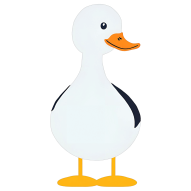

In [154]:
from PIL import Image

im = Image.open("./misc/duck.png")
im

(191, 191)


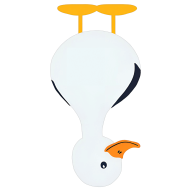

In [158]:
print(im.size)

im_flipped = im.transpose(Image.FLIP_TOP_BOTTOM)
im_flipped

In [159]:
im_flipped.save('./misc/flipped-duck.png')

##### Non-rel/NoSQL databases (MongoDB in this case)

Both structured and unstructured.MongoDB uses BSON, or Binary JSON. Quickly traversed, can differentiate between types, and further


#### Final Exercise: Gathering Multiple Datasets

In this excersise, you will gather the hospital building data using three different gathering methods. The data includes information on hospital buildings such as height, number of stories, etc.

Ensure you programmatically load your dataset(s) into the notebook.


*Fill in*: What data did you see in the output value?



*Fill in*: What data did you see in the output? Is that the same with the data you gathered from the API?



*FILL IN*: Brief description of specific data parsed.

In [ ]:
#Imports - can be modified
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [167]:
## 1. Extract a dataset via API

### 1.1 Extract a dataset via API
'''You may use the requests library to do so programmatically, or manually access the dataset via an API:

https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=d97adf28-ebaf-4204-a29e-bb6bdb7f96b9'''

#FILL IN
#Extract data via API
response = requests.get('https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=d97adf28-ebaf-4204-a29e-bb6bdb7f96b9')

#Raise an exception if we made a request resulting in an error
response.raise_for_status()

#Get the JSON
response_json = response.json()

### 1.2 Parse the obtained data
'''
Parse the obtained data to get the **first** relevant data value or record from your JSON file. 

**Note:** Please ensure the result you obtain is in text and is relevant to hospital building data.'''

#Fill in - get the first data record/value from the JSON results
response_json['result']['records'][0]


{'_id': 1,
 'County Code': '01 - Alameda',
 'Perm ID': '11210',
 'Facility Name': 'Alameda Hospital',
 'City': 'Alameda',
 'Building Nbr': 'BLD-01278',
 'Building Name': 'Original Hospital',
 'Building Status': 'OSHPD 1R-No Gen Acute Care - OSHPD Bldg',
 'SPC Rating *': 'N/A',
 'Building URL': 'https://esp.oshpd.ca.gov/CitizenAccess/Cap/CapDetail.aspx?Module=Permits&TabName=Permits&capID1=26HIS&capID2=00000&capID3=00002&agencyCode=OSHPD',
 'Height (ft)': '44.17',
 'Stories': '4',
 'Building Code': 'Unknown',
 'Building Code Year': None,
 'Year Completed': '1926',
 'AB 1882 Notice': None,
 'Latitude': '37.7626572',
 'Longitude': '-122.2538986',
 'Count': '1'}

In [ ]:
## 2. Extract a dataset via manual download

### 2.1 Download a dataset manually
'''We provided you a csv file `hospital_building_data.csv`. You can think that we pre-downloaded the data for you.

Load the dataset into this notebook.'''

#FILL IN - load a dataset that was downloaded manually into a dataframe
df = pd.read_csv('./datasets/hospital/hospital_building_data.csv', encoding='utf8')
df.head()

### 2.2 Parse the obtained data
'''Parse the obtained data to get the **first** relevant data value or record from your manually downloaded dataset.

Please ensure the result you obtain is relevant to the hospital building data.'''

#Fill in - get the first data record/value from the manually downloaded file
df.head(1)

,County Code,Perm ID,Facility Name,City,Building Nbr,Building Name,Building Status,SPC Rating *,Building URL,Height (ft),Stories,Building Code,Building Code Year,Year Completed,AB 1882 Notice,Latitude,Longitude,Count
0,01 - Alameda,11210,Alameda Hospital,Alameda,BLD-01278,Original Hospital,No Gen Acute Care - OSHPD Bldg,NaN,https://esp.oshpd.ca.gov/CitizenAccess/Cap/Cap...,44.17,4.0,Unknown,NaN,1926.0,NaN,37.762657,-122.253899,1


In [ ]:
## 3. Extract a dataset via scraping

'''
### 3.1 Extract your dataset via scraping
Data webpage url:

https://data.chhs.ca.gov/datastore/odata3.0/d97adf28-ebaf-4204-a29e-bb6bdb7f96b9

Extract your dataset via scraping using `requests`, and `BeautifulSoup`.
'''


#Extract a dataset via scraping
response = requests.get('https://data.chhs.ca.gov/datastore/odata3.0/d97adf28-ebaf-4204-a29e-bb6bdb7f96b9')

#Raise an exception if we made a request resulting in an error
response.raise_for_status()

# Use BeautifulSoup to parse the result
soup = BeautifulSoup(response.content)


### 3.2 Parse the obtained data 
'''**Note:** Please ensure the result you obtain is in text (not with HTML tags) and is relevant 
to the hospital buidling data. Hint: you can use the `find_all()` method with tags like 
`d:buildingname`, `d:buildingcode`, etc.'''

#FILL IN - parse specific records from scraped data
bldg_names = []
for item in soup.find_all('d:buildingname'):
    bldg_names.append(item.text.strip())
    
print(bldg_names[:3], len(bldg_names))

C:\Users\Ethan\AppData\Local\Temp\ipykernel_19168\195965458.py:23: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(response.content)


['Original Hospital', 'Stephens Wing', 'West Wing'] 500


In [168]:
# Using a list comprehension
[hs.get_text() for hs in soup.find_all('d:buildingname')]

['Original Hospital',
 'Stephens Wing',
 'West Wing',
 'South Wing',
 'Radiology Addition',
 'Medical Gas Storage',
 'Compactor Shed',
 'Emergency Room Relocation',
 'LOX Tank',
 'Ehman Building',
 'North Wing',
 'East Wing',
 'Original West Wing',
 'West Service Wing - Building 1',
 'Physio-Therapy Building',
 'Original Emergency Wing',
 'Special Procedures Addition',
 'Emergency Department Expansion',
 'Cogeneration Building',
 'Emergency Generator Building',
 'Transformer Building',
 'South Wing - Phase 2',
 'West Service Wing - Building 2 - Structurally connected to BLD-00699',
 'Orig Emergency Wing - East Wing - Structurally connected to BLD-00702',
 'Patient Care Pavilion',
 'New LOX Tank',
 'Emergency Generator Yard',
 'Main Hospital Building',
 'Main Entrance Canopy',
 'Bridge at Link',
 'Admin.',
 'Laundry/Hall of Health',
 'Boiler',
 '1968 Building',
 '1975 Building',
 '1985 Building',
 'Electric Service Building',
 'Oxygen Tank Enclosure',
 'Replacement Hospital',
 'Chiller 

### Assessing Data

**ID and document issues**

Great, you've extracted the data, now it's time to assess it. The goals for this step are to find:
- Data **quality** issues (missing, duplicate, or incorrect data). AKA **Dirty Data**
- Data **structural** issues like data w/different formats. AKA **messy data**
  - Ambiguous or unclear data
  - Transforming doctor's notes into a neat text/flat file.

Usually using programmatic assessment (pandas to inspect) and visual assessment (w/ Excel or other tools (also pandas/matplot))

#### Dimensions of Data Quality

- **Completeness** - the data is sufficient for addressing specific questions or solving a given problem
  - "This data is incomplete, I ought to go collect some more" is kinda what I think of as the inverse.
  - Lacking completeness = missing values (Null/NaN)
- **Validity** - how well the data conforms to a defined set of rules for the data, AKA schema.
  - Invalid data is not usable
  - Does data lie within the right range and what are your data types?
- **Accuracy** - Does the data accurately represent the reality that it aims to depict
  - Weights for patients are +5 lbs, for example
  - Check data source and cross-reference data
- **Consistency** - Follows a standard format and info matches that which can be found in other data sources
  - 1 col for dates are MM-DD-YYYY and the other has DD MMM YYYY
  - Ensure accuracy and cross-reference
- **Uniqueness** - non-duplicate or overlapping values in the data
  - John Smith == John K. Smith == John Keith Smith and they are all the same person
    - programatically remove duplicates and assign unique IDs to each row (key)

Visual example of some errors. How many can you spot?

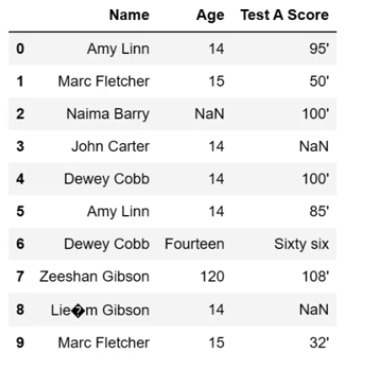

<details>
<summary>Expand for the answer</summary>

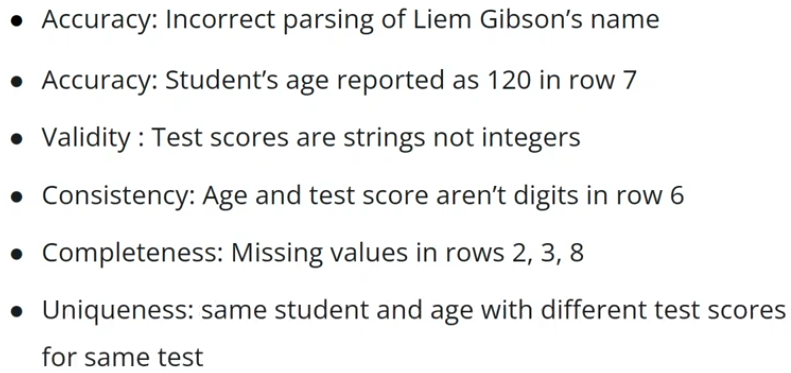

</details>

#### Visual Assessments

Examples include
- Jupyter NB + pandas
- Text editor
- Spreadsheet application

Two types
1. Directed
    - Systematically looking through each data table in an application to spot inconsistencies, missing data, etc.
    - May need to truncate data if it is too large for a spreadsheet program, etc.
2. Non-directed
    - Looking at different portions of tables closely - scrolling through data, hunting for intriguing or relevant issues
      - Kinda like looking at those HBSS logs
    - Upon seeing something noteworthy, you continue to dig in and see where else that issue comes to fruition

#### Programmatic Assessments (plotting, `.info()`, etc.)

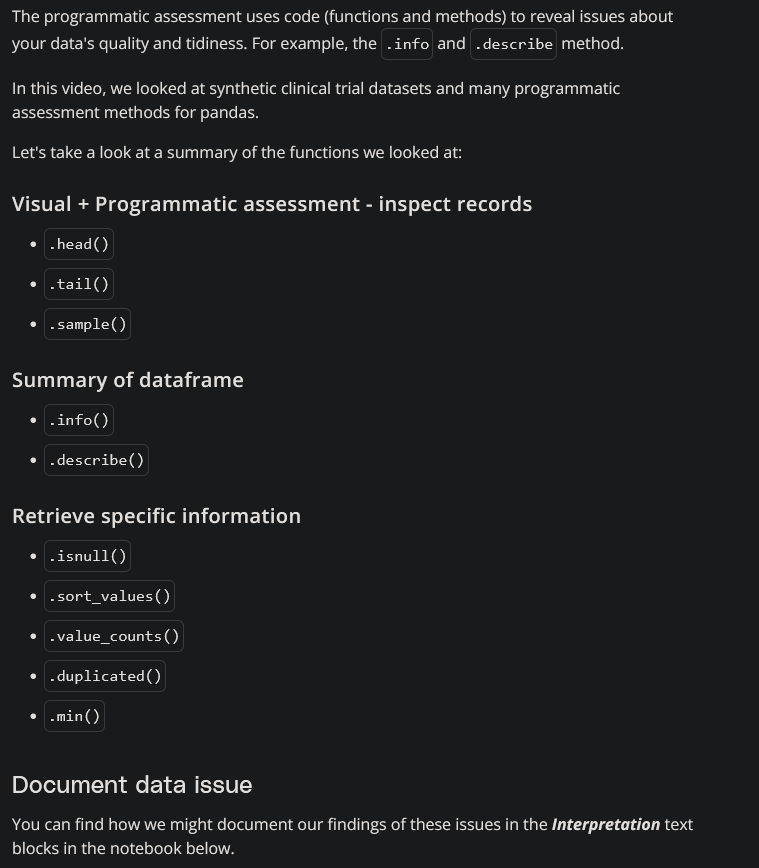

To have a reproducible random state, use `df.sample(random_state=<int>)`

To check for duplicates across a subset of multiple columns, use `df.duplicate(subset=['a','b','c'])`

------
------

### Cleaning Data

### Doing it with Python

## Data Modeling